In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r'D:\DATA\haberman.csv')

In [4]:
df

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [6]:
df.shape

(305, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [13]:
df["status"].value_counts()

1    224
2     81
Name: status, dtype: int64

<AxesSubplot:>

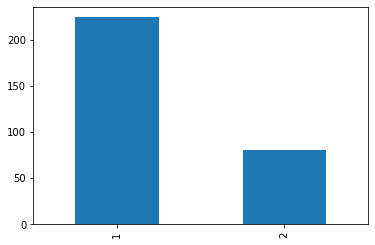

In [15]:
df["status"].value_counts().plot.bar()

In [24]:
survived = df.loc[df["status"] == 1] 
unsurvived = df.loc[df["status"] == 2]

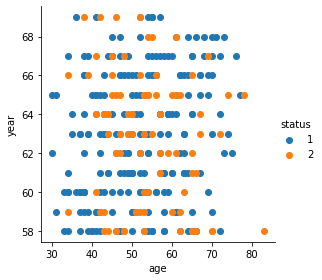

In [27]:
sns.FacetGrid(df,hue="status",height=4).map(plt.scatter,"age","year").add_legend()

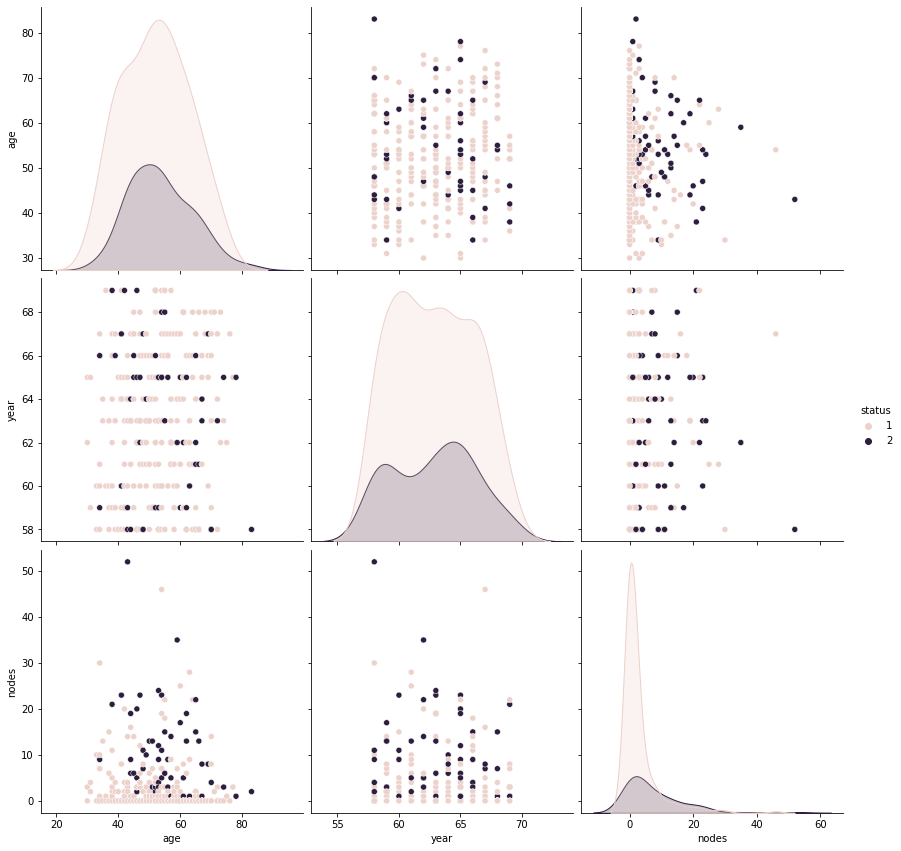

In [28]:
sns.pairplot(df,hue="status",height=4)
plt.show()

it seems that age and year features will be making sense for further analysis ( plot 3 and 5)

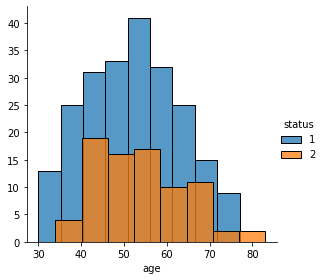

In [31]:
sns.FacetGrid(df,hue="status",height=4).map(sns.histplot,"age").add_legend()
plt.show()

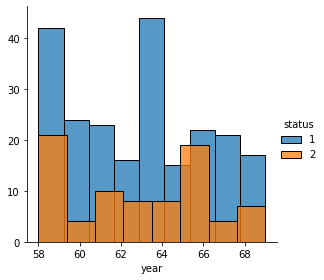

In [32]:
sns.FacetGrid(df,hue="status",height=4).map(sns.histplot,"year").add_legend()
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


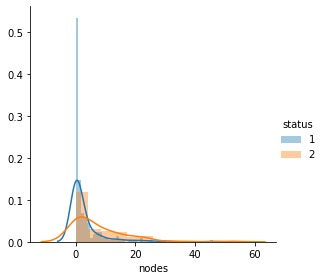

In [34]:
sns.FacetGrid(df,hue="status",height=4).map(sns.distplot,"nodes").add_legend()

From observation we can say that, the patients servived if they have less nodes and unsurvived if have more nodes.

### Mean ,variance ,std

In [35]:
print("Mean")
print(np.mean(df["nodes"]))
print(np.mean(df["age"]))

Mean
4.036065573770492
52.5311475409836


In [36]:
print("Variance")
print(np.var(df["nodes"]))
print(np.var(df["age"]))

Variance
51.66099435635562
115.05558720773972


In [37]:
print("STD")
print(np.std(df["nodes"]))
print(np.std(df["age"]))

STD
7.187558302814359
10.726396748570311


### median,IQR,median_abolute_deviation

In [39]:
print("Median")
print(np.median(df["age"]))
print(np.median(df["nodes"]))

Median
52.0
1.0


In [43]:
print("Quantiles")
print("Age :",np.percentile(df["age"],np.arange(0,100,25)))

Quantiles
Age : [30. 44. 52. 61.]


In [45]:
print("Percentile")
print("Age :",np.percentile(df["age"],90))

Percentile
Age : 67.0


In [46]:
print("IQR")
print(np.percentile(df["age"],75) - np.percentile(df["age"],25))

IQR
17.0


In [47]:
def median_absolute_deviation(arr):
    return pd.Series(arr).mad()

In [52]:
from statsmodels import robust
print("\nMedian Absolute Deviation:")
print(robust.mad(df["age"]))


Median Absolute Deviation:
11.860817748044816


# Box plot and Whiskers 

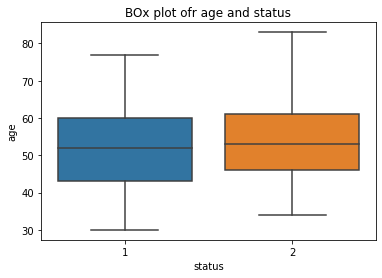

In [53]:
sns.boxplot(data=df,x='status',y='age')
plt.title("BOx plot ofr age and status")
plt.show()

# Violen plot

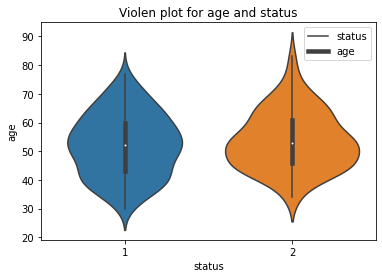

In [57]:
sns.violinplot(x="status",y="age",data=df)
plt.title("Violen plot for age and status")
plt.legend(labels=['status','age'])
plt.show()

## multivariatw probability density,contour

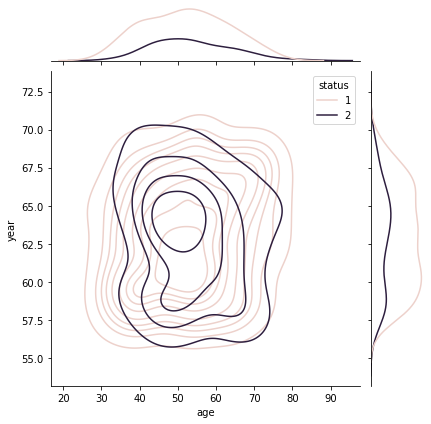

In [58]:
sns.jointplot(data=df,x='age',y='year',hue='status',kind='kde')
plt.show()

From above plot we can conclude that 40 to 65 age group people in year 1962 to 1967 have dectected and operated on cancer treatment and didn't survived, and in the same age group in year 1958 to 1963 have detected and operated on cancer tr3atment and they survived.